In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set up Selenium WebDriver
chrome_options = Options()
chrome_options.add_argument("--headless")  # Run Chrome in headless mode
driver = webdriver.Chrome()
url = "https://www.bbc.com/weather/293397"
driver.get(url)

# Extract HTML content
html_content = driver.page_source

# Use BeautifulSoup to parse HTML
soup = BeautifulSoup(html_content, "html.parser")

forecast = soup.find('ol',class_='wr-day-carousel__list wr-js-day-carousel-list clearfixwr-day-carousel__list wr-js-day-carousel-list clearfix')
wthrs = soup.find_all('li',class_='wr-day')
# Find relevant elements and extract data
weather_data = {"Day": [],
        "Temperature": [],
        "Description": []}
for forecast in wthrs:
    day = forecast.find("span", class_="wr-date__long__dotm")
    temperature = forecast.find("span", class_="wr-value--temperature--c")
    description = forecast.find("div", class_="wr-day__weather-type-description-container")
    if day:
        weather_data['Day'].append(day.text[:4])
    else:
        weather_data['Day'].append(day)
    weather_data['Temperature'].append(int(temperature.text.strip().replace("°", "")))
    weather_data['Description'].append(description.text.strip())
# Close the Selenium WebDriver
driver.quit()

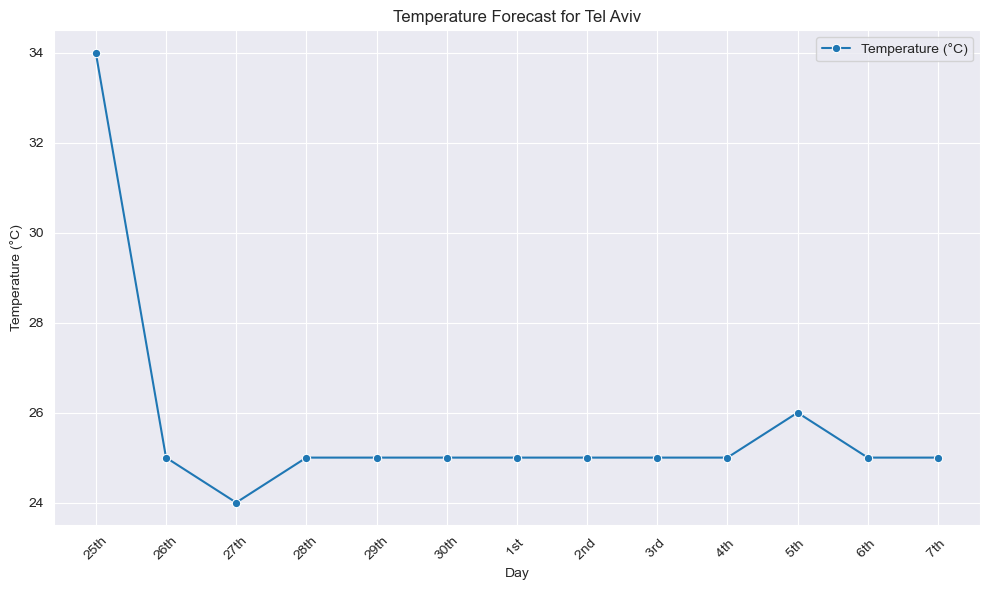

In [2]:
# Convert data to Pandas DataFrame
df_weather = pd.DataFrame(weather_data)

# Clean and preprocess the data if necessary
# For example, convert temperature to numeric

# Perform basic analysis
# For example, calculate average temperature and precipitation

# Visualize the data
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_weather, x="Day", y="Temperature", marker="o", label="Temperature (°C)")
plt.title("Temperature Forecast for Tel Aviv")
plt.xlabel("Day")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45) 
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [3]:
df_weather

,Day,Temperature,Description
0,None,35,Sunny and a gentle breeze
1,25th,34,Sunny and a gentle breeze
2,26th,25,Sunny intervals and a gentle breeze
3,27th,24,Sunny intervals and a gentle breeze
4,28th,25,Sunny intervals and a gentle breeze
5,29th,25,Sunny and a gentle breeze
6,30th,25,Sunny and a gentle breeze
7,1st,25,Sunny and a gentle breeze
8,2nd,25,Misty and a gentle breeze
9,3rd,25,Sunny intervals and a gentle breeze
